<a href="https://colab.research.google.com/github/rrifqi23/Wine-Quality-Test-Multiple-Polynomial-Regression/blob/main/WineQualityTestMultiPolyReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [77]:
df = pd.read_csv('WineQT.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [78]:
df = df.drop(columns='Id')

In [109]:
df.loc[df['quality'] == 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
324,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
368,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1074,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


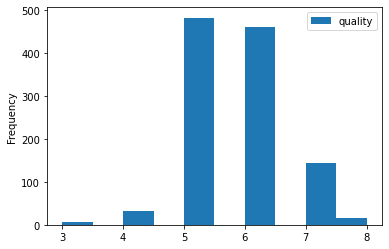

In [80]:
df[['quality']].plot(kind='hist')

In [81]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [82]:
features = np.array(df.iloc[:, :-1].values)
labels = np.array(df.iloc[:, -1].values)

features = StandardScaler().fit_transform(features)

# create the Lasso model with cross-validation
lasso = LassoCV(cv=5)

# fit the model
lasso.fit(features, labels)

# get the coefficient values and feature names
coefs = lasso.coef_
features = list(df.columns[:-1])

# print the coefficients and feature names
for feature, coef in zip(features, coefs):
    print(feature, coef)

fixed acidity 0.00020791632287301944
volatile acidity -0.19624876254710216
citric acid 0.0
residual sugar 0.0
chlorides -0.06405834290037715
free sulfur dioxide 0.0
total sulfur dioxide -0.06459469021831003
density -0.0
pH -0.05400822153660708
sulphates 0.12692950443054868
alcohol 0.3110579076425846


In [83]:
features = np.array(df[['volatile acidity', 'sulphates', 'alcohol']].values)

In [93]:
# Transform the independent variables to include polynomial terms
poly = PolynomialFeatures(degree=4)
f_poly = poly.fit_transform(features)

In [85]:
features

array([[ 0.7  ,  0.56 ,  9.4  ],
       [ 0.88 ,  0.68 ,  9.8  ],
       [ 0.76 ,  0.65 ,  9.8  ],
       ...,
       [ 0.6  ,  0.58 , 10.5  ],
       [ 0.55 ,  0.76 , 11.2  ],
       [ 0.645,  0.71 , 10.2  ]])

In [86]:
labels

array([5, 5, 5, ..., 5, 6, 5])

In [94]:
regr = LinearRegression()
regr.fit(f_poly, labels)

LinearRegression()

In [95]:
# Prediction
k = 5

y_pred = regr.predict(f_poly)
y_pred = np.round(y_pred).astype(int)

y_cvpred = cross_val_predict(regr, f_poly, labels, cv=k)
y_cvpred = np.round(y_cvpred.astype(int))

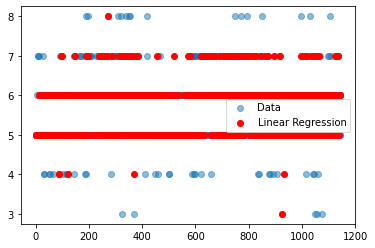

In [96]:
# Model Visualization
plt.scatter(np.arange(1, len(labels)+1), labels, alpha=0.5, label="Data")
plt.scatter(np.arange(1, len(labels)+1), y_pred, color='red', label="Linear Regression")
plt.legend()
plt.show()

Perfect!

In [113]:
# Metrics
y_cvpred = cross_val_predict(regr, f_poly, labels, cv=k)
y_cvpred = np.round(y_cvpred.astype(int))

mae = mean_absolute_error(labels, y_cvpred)
mse = mean_squared_error(labels, y_cvpred)
r2 = regr.score(f_poly, labels)
cv_score = cross_val_score(regr, f_poly, labels, cv=k)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-Squared: {r2:.2f}')
print(f'Mean: {np.mean(cv_score):.2f} +/- {np.std(cv_score):.2f}')

Mean Absolute Error: 0.57
Mean Squared Error: 0.74
R-Squared: 0.42
Mean: 0.27 +/- 0.10


In [91]:
y_pred

array([5, 5, 5, ..., 6, 6, 6])

In [111]:
predict_val = np.array([[10.4, 0.610, 0.49, 2.1, 0.200, 5.0, 16.0, 0.99940, 3.16, 0.63, 8.40]])

predict_val = np.array([predict_val[0, (1, -2, -1)]])
predict_polyfit = poly.fit_transform(predict_val)

predict = regr.predict(predict_polyfit)

raw_quality = predict[0]
quality = (np.round(raw_quality))

# print(raw_quality)
print(raw_quality)
print(quality.astype(int))

4.372559455728339
4


In [112]:
filename = 'WineQualityTestMultiPolyReg.model'
pickle.dump((regr, poly), open(filename, 'wb'))